In [77]:
from textblob.classifiers import NaiveBayesClassifier
import pandas as pd
import numpy as np
from textblob import TextBlob


In [78]:
df_train = pd.DataFrame()
for chunk in pd.read_csv('c://workspace//Test.csv', header=None, names=['text', 'label'], chunksize=1000):
    df_train = pd.concat([df_train, chunk], ignore_index=True)

In [82]:
df_train = df_train[1:]

In [83]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [84]:
df_train['polarity'] = df_train['text'].apply(get_polarity)

In [87]:
def get_sentiment(polarity):
    if polarity > 0:
        return "POSITIVE"
    elif polarity == 0:
        return "NUTRAL"
    else:
        return "NEGATIVE"
    

In [88]:
df_train['sentiment'] = df_train['polarity'].apply(get_sentiment)

In [91]:
df_train.to_csv('out.csv')

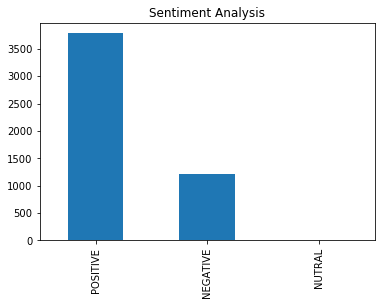

In [90]:
df_train.sentiment.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [69]:
records = df_train.to_records(index=False)
result_train = list(records)

In [ ]:
len(df_train)

In [ ]:
cl.accuracy(result_test)

In [115]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [116]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df_train['text']=df_train['text'].apply(denoise_text)

In [117]:
df_test['text']=df_test['text'].apply(denoise_text)

In [118]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df_train['text']=df_train['text'].apply(remove_special_characters)

In [119]:
df_test['text']=df_test['text'].apply(remove_special_characters)

In [120]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df_train['text']=df_train['text'].apply(remove_stopwords)

{'not', 're', "shouldn't", 'few', "you'll", 'you', "shan't", 'wouldn', "it's", 'be', 'very', 'about', 'their', 'yourself', 'our', "haven't", 'because', 'where', 'same', 'weren', 'hers', 'hadn', "couldn't", 'down', 'further', "mightn't", 'i', 'a', "hadn't", 's', 'myself', 'mustn', "wouldn't", 'just', 'before', 'off', 'after', 'shouldn', 'yourselves', 'of', 'that', 'yours', 'now', 'couldn', 'until', 'so', 'and', 'her', 'which', 'did', 'should', 'does', 'having', 'as', 'these', 'have', 'up', 'on', 'am', 'how', 'needn', 'with', 'your', 'ourselves', 'in', 'why', 'an', "hasn't", 'his', 'its', 'they', 'below', 'over', "didn't", "weren't", 'than', 'been', 'the', 've', 'mightn', 'if', 'was', 'while', 'out', 'there', 'them', 'again', 'ain', 'isn', 'doing', 'during', "doesn't", 'into', 'ma', "that'll", 'all', 't', 'such', 'each', "mustn't", 'she', "she's", 'were', "should've", 'under', 'against', 'any', 'will', 'some', 'don', 'being', 'then', 'here', 'or', 'had', 'my', 'me', 'it', 'most', "don't"

In [121]:
df_test['text']=df_test['text'].apply(remove_stopwords)